1. Introduction

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. 

2. About Data: 
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
train  = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test  = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

print(" Train Shape: ",train.shape,"\n Test Shape: ", test.shape)

# Creating X_train & y_train
X = train.drop(['label'], axis = 1)
print("\n X Shape: ", X.shape)
y = train['label']


X = X.values # Converting to array from dataframe
# X = X/255.0 # Normalize data
X = X.reshape(-1, 28, 28, 1)  # Reshape X_train into 3 dimensions 


print("\n X Shape: ", X.shape)
print("\n y Shape: ", y.shape)

 Train Shape:  (42000, 785) 
 Test Shape:  (28000, 784)

 X Shape:  (42000, 784)

 X Shape:  (42000, 28, 28, 1)

 y Shape:  (42000,)


After reading the train and test data set , lets take the train data and split the images and labels into X and y respectively. Take the dataframe X and convert it to a numpy array and reshape it.

(42000, 10) [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


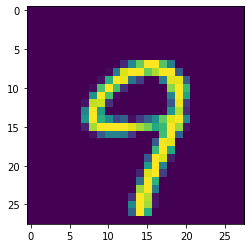

In [3]:
y = to_categorical(y, num_classes = 10)
#y = np.array(y).astype(float)
print(y.shape, y[0])
plt.imshow(X[88][:,:,0])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


In [5]:
train_datagen = ImageDataGenerator(
            rescale=1/255.0,
            rotation_range=20,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1
           
    )

validation_datagen = ImageDataGenerator(
            rescale=1/ 255.0
)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=100
)

validation_generator = validation_datagen.flow(
    X_test, 
    y_test,
    batch_size=100
)



In [6]:
#Callback Class
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.999):
            print("\nReached  99.9% accuracy & stopping training!!!")
            self.model.stop_training = True
                
callbacks = myCallback()    

In [7]:
def plot(history):
    %matplotlib inline
    import matplotlib.pyplot as plt
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    


In [8]:
    
# Model 1:  
    
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),padding = 'Same', activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),padding = 'Same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),padding = 'Same', activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
    
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# history = model1.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), callbacks= [callbacks])
   
#model.summary()

In [9]:

history = model1.fit(
                train_generator, 
                epochs = 50,
                validation_data = validation_generator,
                callbacks = [callbacks]
               
)

Epoch 1/50
336/336 [==============================] - 12s 35ms/step - loss: 0.3687 - accuracy: 0.8791 - val_loss: 0.0726 - val_accuracy: 0.9782
Epoch 2/50
336/336 [==============================] - 11s 34ms/step - loss: 0.1129 - accuracy: 0.9649 - val_loss: 0.0491 - val_accuracy: 0.9845
Epoch 3/50
336/336 [==============================] - 12s 35ms/step - loss: 0.0903 - accuracy: 0.9712 - val_loss: 0.0418 - val_accuracy: 0.9868
Epoch 4/50
336/336 [==============================] - 12s 34ms/step - loss: 0.0750 - accuracy: 0.9768 - val_loss: 0.0352 - val_accuracy: 0.9889
Epoch 5/50
336/336 [==============================] - 13s 39ms/step - loss: 0.0668 - accuracy: 0.9790 - val_loss: 0.0334 - val_accuracy: 0.9898
Epoch 6/50
336/336 [==============================] - 12s 35ms/step - loss: 0.0594 - accuracy: 0.9809 - val_loss: 0.0288 - val_accuracy: 0.9896
Epoch 7/50
336/336 [==============================] - 12s 34ms/step - loss: 0.0554 - accuracy: 0.9824 - val_loss: 0.0289 - val_accuracy:

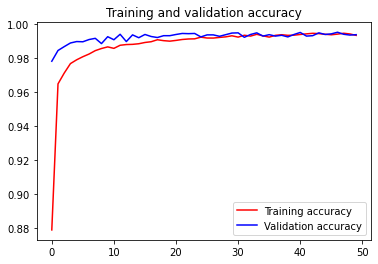

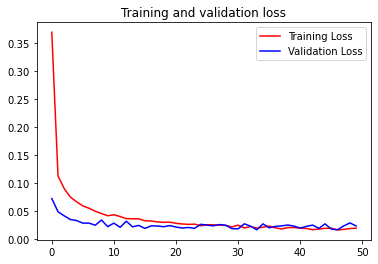

In [10]:
plot(history)

# Modification:
Modifications in the model creates variations in the accuracies of ther model.

After changing the filters to (5,5) from (3,3) in 1st & 2nd CNN layers and adding another Convnet layer with dropout layer in between the Dense layer causes the accuracy to increase. 


Adding dropout of 40% after every Convnet layer.
 accuracy: 0.9905     - val_loss: 0.0268 -     val_accuracy: 0.9940

Reducing dropout to 20% with added conv layers:
loss: 0.0307 - accuracy: 0.9916 - val_loss: 0.0348 - val_accuracy: 0.9939

After reducing extra conv layers:
loss: 0.0267 - accuracy: 0.9923 - val_loss: 0.0245 - val_accuracy: 0.9931

In [11]:
#  Model 2
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5),padding = 'Same', activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (5,5),padding = 'Same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (5,5),padding = 'Same', activation = 'relu'),
    tf.keras.layers.Conv2D(256, (3,3),padding = 'Same', activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
    
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# history = model.fit(X_train, y_train, epochs = 50, callbacks= [callbacks])

In [ ]:
history_2 = model_2.fit_generator(
                train_generator, 
                epochs = 50,
                validation_data = validation_generator,
                callbacks = [callbacks]
               
)

Epoch 1/50
336/336 [==============================] - 12s 37ms/step - loss: 0.3584 - accuracy: 0.8834 - val_loss: 0.0638 - val_accuracy: 0.9812
Epoch 2/50
336/336 [==============================] - 13s 38ms/step - loss: 0.1044 - accuracy: 0.9688 - val_loss: 0.0398 - val_accuracy: 0.9876
Epoch 3/50
336/336 [==============================] - 12s 36ms/step - loss: 0.0798 - accuracy: 0.9754 - val_loss: 0.0369 - val_accuracy: 0.9886
Epoch 4/50
336/336 [==============================] - 13s 38ms/step - loss: 0.0600 - accuracy: 0.9817 - val_loss: 0.0353 - val_accuracy: 0.9898
Epoch 5/50
204/336 [=================>............] - ETA: 5s - loss: 0.0564 - accuracy: 0.9826

Here, in Model 2, we get 99.53% accuracy and val_accuracy of 99.32%
There are times when the validation accuracy is higher than the training accuracy.
This happens when Dropoutis used, since the behaviour when training and validation are different.

When training, a percentage of the features are set to zero (40% in your case since you are using Dropout(0.5)). When validating, all features are used (and are scaled appropriately). So the model at test time is more robust leads to higher validation accuracies.

In [ ]:
plot(history_2)

In [ ]:
test_dataframe = test
test = test.values
test= test/255.0
test= test.reshape(-1, 28, 28, 1)

y_pred = model6.predict(test)
y_pred = np.argmax(y_pred, axis =1)

submission = pd.DataFrame({
    "ImageID": test_dataframe.index+1,
    "Label": y_pred
})


submission.to_csv('my_submission.csv', index=False)